In [1]:
from zipfile import *
import io
import numpy as np

In [2]:
import cv2 as cv
from matplotlib import pyplot as plt

[Extraction of camera position and orientation from transformation matrix](https://math.stackexchange.com/questions/82602/how-to-find-camera-position-and-rotation-from-a-4x4-matrix)

In [3]:
device = "cpu"

In [3]:
path = "C:\\Users\\asus guest\\Desktop\\ENS492\\a\\Swin3D\\" # "C:\\Users\\asus guest\\Desktop\\ENS492\\Dataset\\"
zip_file = path+"rgbd-scene-time-lapses.zip"
zipf = ZipFile(zip_file, 'r')

In [5]:
def getMat(ptxt):
    t = np.array(str(ptxt,encoding="UTF-8")[2:-3].replace("\r\n","").split("\t ")).astype(np.float32)
    return t.reshape(4,4)

In [6]:
mat0 = getMat(zipf.read('chess/seq-01/frame-000000.pose.txt'))
print(mat0)

[[ 0.9993511  -0.01557608  0.03150894 -0.12323361]
 [ 0.00923751  0.98130137  0.19211653 -1.1206967 ]
 [-0.03391284 -0.19170459  0.98083067 -0.98870575]
 [ 0.          0.          0.          1.        ]]


In [7]:
mat0.dot(np.array([1,1,1,1])[:,None])

array([[ 0.89205033],
       [ 0.06195874],
       [-0.23349252],
       [ 1.        ]])

In [35]:
def getPose(matrix):
    """
    # Extract rotation and translation components from the input matrix
    rotation_matrix = matrix[:3, :3]
    translation_vector = matrix[:3, 3]
    # Compute camera position
    camera_position = -np.linalg.inv(rotation_matrix).dot(translation_vector)
    # Compute orientation vector
    orientation_vector = rotation_matrix.dot(np.array([0, 0, 1]))
    return camera_position, orientation_vector
    """
    return matrix[:3, 3]

In [12]:
# Example usage
position, orientation = getPose(mat0)
print("Camera Position:", position)
print("Camera Orientation Vector:", orientation)

Camera Position: [0.09998192 0.90832716 1.1890196 ]
Camera Orientation Vector: [0.03150894 0.19211653 0.98083067]


In [36]:
for i in range(4):
    mat = getMat(zipf.read(f"chess/seq-01/frame-0000{i}0.pose.txt"))
    print(mat)

[[ 0.9993511  -0.01557608  0.03150894 -0.12323361]
 [ 0.00923751  0.98130137  0.19211653 -1.1206967 ]
 [-0.03391284 -0.19170459  0.98083067 -0.98870575]
 [ 0.          0.          0.          1.        ]]
[[ 0.99913275 -0.01283942  0.03880296 -0.1391464 ]
 [ 0.00491264  0.9801934   0.19784227 -1.1227895 ]
 [-0.04057545 -0.19748405  0.9794292  -0.9880539 ]
 [ 0.          0.          0.          1.        ]]
[[ 0.99936974 -0.02643305  0.02228753 -0.13108535]
 [ 0.02097274  0.97591275  0.21701941 -1.1230452 ]
 [-0.02748767 -0.21642022  0.9758756  -0.9564172 ]
 [ 0.          0.          0.          1.        ]]
[[ 0.99868065 -0.04800304  0.01630756 -0.13357243]
 [ 0.04214135  0.9648362   0.25933856 -1.1270621 ]
 [-0.02818373 -0.25831607  0.96560967 -0.8878137 ]
 [ 0.          0.          0.          1.        ]]


In [37]:
for i in range(10):
    mat = getMat(zipf.read(f"chess/seq-01/frame-0000{i}0.pose.txt"))
    print(getPose(mat), sep="\t")

[-0.12323361 -1.1206967  -0.98870575]
[-0.1391464 -1.1227895 -0.9880539]
[-0.13108535 -1.1230452  -0.9564172 ]
[-0.13357243 -1.1270621  -0.8878137 ]
[-0.13570715 -1.1166031  -0.8089163 ]
[-0.14183578 -1.1034652  -0.70418286]
[-0.10361709 -1.0821307  -0.60061264]
[-0.06198834 -1.0649443  -0.5133843 ]
[-0.01375127 -1.0465987  -0.42236707]
[ 0.0215355  -1.0149047  -0.30143443]


In [38]:
print(mat0)
print(getPose(mat0),sep="\t")

[[ 0.9993511  -0.01557608  0.03150894 -0.12323361]
 [ 0.00923751  0.98130137  0.19211653 -1.1206967 ]
 [-0.03391284 -0.19170459  0.98083067 -0.98870575]
 [ 0.          0.          0.          1.        ]]
[-0.12323361 -1.1206967  -0.98870575]


In [39]:
mats = [getMat(zipf.read(f"chess/seq-01/frame-000{i}.pose.txt")) for i in range(100,1000)]

In [40]:
poss = [getPose(m)[0] for m in mats]

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plotPath(posarray):
    # Extract x, y, and z coordinates from the list of 3D position vectors
    x = [pos[0] for pos in posarray]
    y = [pos[1] for pos in posarray]
    z = [pos[2] for pos in posarray]

    # Compute the color gradient
    num_points = len(posarray)
    print(num_points)
    colors = plt.cm.viridis(np.linspace(0, 1, num_points))  # Viridis colormap goes from blue to green to yellow

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D path with color gradient
    for i in range(num_points - 1):
        ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=colors[i])

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Path of Object')

    # Show plot
    plt.show()


In [43]:
plotPath(poss)

IndexError: invalid index to scalar variable.

In [6]:
train_csv = "C:\\Users\\asus guest\\Desktop\\ENS492\\a\\multi-scene-pose-transformer\\datasets\\7Scenes\\abs_7scenes_pose.csv_fire_train.csv"
test_csv = "C:\\Users\\asus guest\\Desktop\\ENS492\\a\\multi-scene-pose-transformer\\datasets\\7Scenes\\abs_7scenes_pose.csv_fire_test.csv"

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def plotPath(posarray):
    # Extract x and y coordinates from the list of 3D position vectors
    x = [pos[0] for pos in posarray]
    y = [pos[1] for pos in posarray]

    # Compute the color gradient
    num_points = len(posarray)
    colors = plt.cm.viridis(np.linspace(0, 1, num_points))  # Viridis colormap goes from blue to green to yellow

    # Create a 2D plot
    plt.figure()

    # Plot the 2D path with color gradient
    for i in range(num_points - 1):
        plt.plot(x[i:i+2], y[i:i+2], color=colors[i])

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Path of Object (Bird\'s Eye View)')

    # Show plot
    plt.show()
plotPath(poss)

IndexError: invalid index to scalar variable.

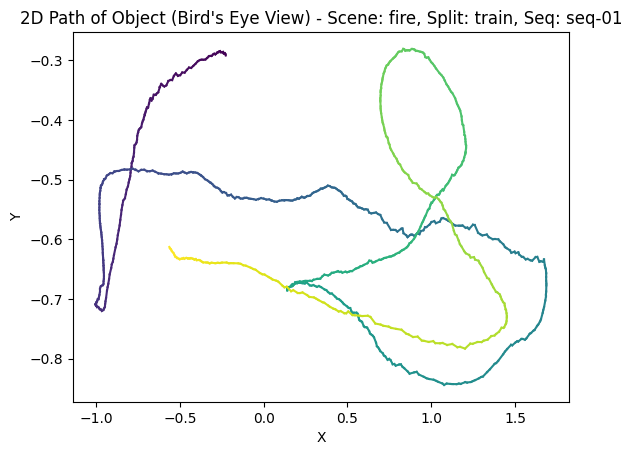

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def plotPathFromCSV(csv_file, scene, split, seq):
    # Read position information from CSV file for the specified scene, split, and seq
    posarray = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['scene'] == scene and row['split'] == split and row['seq'] == seq:
                # Extract position vector (x, y, z) from the columns 't1', 't2', 't3'
                position = [float(row['t1']), float(row['t2']), float(row['t3'])]
                posarray.append(position)

    # Extract x and y coordinates from the list of position vectors
    x = [pos[0] for pos in posarray]
    y = [pos[1] for pos in posarray]

    # Compute the color gradient
    num_points = len(posarray)
    colors = plt.cm.viridis(np.linspace(0, 1, num_points))  # Viridis colormap goes from blue to green to yellow

    # Create a 2D plot
    plt.figure()

    # Plot the 2D path with color gradient
    for i in range(num_points - 1):
        plt.plot(x[i:i+2], y[i:i+2], color=colors[i])

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'2D Path of Object (Bird\'s Eye View) - Scene: {scene}, Split: {split}, Seq: {seq}')

    # Show plot
    plt.show()

# Example usage:
# Replace 'path_to_file.csv' with the path to your CSV file
# Replace 'scene', 'split', and 'seq' with the desired values
plotPathFromCSV(train_csv, 'fire', 'train', 'seq-01')

In [93]:
print(zipf.namelist()[:4])

['chess/TestSplit.txt', 'chess/TrainSplit.txt', 'chess/chess.png', 'chess/seq-01/frame-000000.color.png']


In [47]:
zipf.open("chess/TrainSplit.txt").read()

b'sequence1\r\nsequence2\r\nsequence4\r\nsequence6\r\n'

In [48]:
zipf.open("chess/TestSplit.txt").read()

b'sequence3\r\nsequence5\r\n'

In [54]:
def _k():
    s = """
    Chess-4000 2000-3 x 2 x 1m-0.03m, 0.66◦ 0.41m, 5.60◦ 0.32m, 4.06◦ 0.32m, 3.30◦
    Fire-2000 2000-2.5 x 1 x 1m-0.05m, 1.50◦ 0.54m, 7.77◦ 0.47m, 7.33◦ 0.47m, 7.02◦
    Heads-1000 1000-2 x 0.5 x 1m-0.06m, 5.50◦ 0.28m, 7.00◦ 0.29m, 6.00◦ 0.30m, 6.09◦
    Office-6000 4000-2.5 x 2 x 1.5m-0.04m, 0.78◦ 0.49m, 6.02◦ 0.48m, 3.84◦ 0.48m, 3.62◦
    Pumpkin-4000 2000-2.5 x 2 x 1m-0.04m, 0.68◦ 0.58m, 6.08◦ 0.47m, 4.21◦ 0.49m, 4.06◦
    Red Kitchen-7000 5000-4 x 3 x 1.5m-0.04m, 0.76◦ 0.58m, 5.65◦ 0.59m, 4.32◦ 0.58m, 4.17◦
    Stairs-2000 1000-2.5 x 2 x 1.5m-0.32m, 1.32◦ 0.56m, 7.71◦ 0.47m, 6.93◦ 0.48m, 6.54◦"""
    d = s.split("\n")[1:]
    h = [_u.split("-")[0:2] + (_u.split("-")[2]).split("◦ ") for _u in d]
    print(h)
    j = [";".join(hl) for hl in h]
    return "\n".join(j)

In [55]:
_k()

[['    Chess', '4000 2000', '3 x 2 x 1m'], ['    Fire', '2000 2000', '2.5 x 1 x 1m'], ['    Heads', '1000 1000', '2 x 0.5 x 1m'], ['    Office', '6000 4000', '2.5 x 2 x 1.5m'], ['    Pumpkin', '4000 2000', '2.5 x 2 x 1m'], ['    Red Kitchen', '7000 5000', '4 x 3 x 1.5m'], ['    Stairs', '2000 1000', '2.5 x 2 x 1.5m']]


'    Chess;4000 2000;3 x 2 x 1m\n    Fire;2000 2000;2.5 x 1 x 1m\n    Heads;1000 1000;2 x 0.5 x 1m\n    Office;6000 4000;2.5 x 2 x 1.5m\n    Pumpkin;4000 2000;2.5 x 2 x 1m\n    Red Kitchen;7000 5000;4 x 3 x 1.5m\n    Stairs;2000 1000;2.5 x 2 x 1.5m'

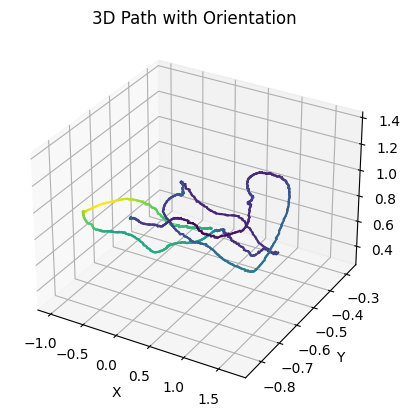

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

def quaternion_to_yaw(q):
    """
    Extracts the orientation around the y-axis (yaw) from a quaternion.
    
    Parameters:
        q (array-like): Quaternion [w, x, y, z].
        
    Returns:
        float: Yaw angle in degrees.
    """
    # Normalize quaternion
    q = np.array(q) / np.linalg.norm(q)
    
    # Convert quaternion to rotation matrix
    w, x, y, z = q
    rotation_matrix = np.array([
        [1 - 2*(y**2 + z**2), 2*(x*y - w*z), 2*(x*z + w*y)],
        [2*(x*y + w*z), 1 - 2*(x**2 + z**2), 2*(y*z - w*x)],
        [2*(x*z - w*y), 2*(y*z + w*x), 1 - 2*(x**2 + y**2)]
    ])
    
    # Extract yaw angle
    yaw = np.arctan2(rotation_matrix[0, 2], rotation_matrix[0, 0])
    
    # Convert angle from radians to degrees
    yaw_degrees = np.degrees(yaw)
    
    return yaw_degrees

def plotPathWithOrientation(csv_file, room, sequence, split):
    """
    Plots a 3D path and colors the graph based on orientation angles extracted from quaternions in a CSV file.
    
    Parameters:
        csv_file (str): Path to the CSV file containing position vectors and quaternions.
        room (str): Name of the room.
        sequence (int): Sequence number.
        split (int): Split number.
    """
    # Read data from CSV and filter based on room, sequence, and split
    positions = []
    orientations = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['scene'] == room and row['seq'] == sequence and row['split'] == split:
                position = [float(row['t1']), float(row['t2']), float(row['t3'])]
                positions.append(position)
                orientations.append([float(row['q1']), float(row['q2']), float(row['q3']), float(row['q4'])])

    # Extract yaw angles from quaternions
    yaw_angles = [quaternion_to_yaw(quaternion) for quaternion in orientations]

    # Extract x, y, and z coordinates from the list of 3D position vectors
    x = [pos[0] for pos in positions]
    y = [pos[1] for pos in positions]
    z = [pos[2] for pos in positions]

    # Compute the color gradient based on yaw angles
    #colors = plt.cm.viridis(np.linspace(0, 1, len(yaw_angles)))  # Viridis colormap
    colors = plt.cm.viridis((np.array(yaw_angles) - min(yaw_angles)) / (max(yaw_angles) - min(yaw_angles)))  # Viridis colormap

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the 3D path with color gradient based on orientation angles
    for i in range(len(x) - 1):
        ax.plot(x[i:i+2], y[i:i+2], z[i:i+2], color=colors[i])

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Path with Orientation')

    # Show plot
    plt.show()

# Example usage:
plotPathWithOrientation(train_csv, "fire", "seq-01", "train")


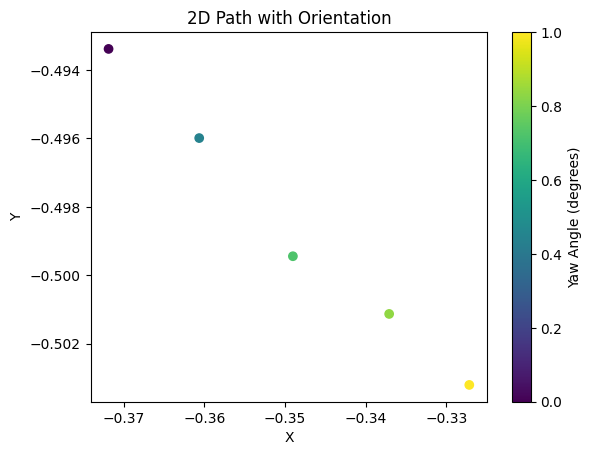

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def quaternion_to_yaw(q):
    """
    Extracts the orientation around the y-axis (yaw) from a quaternion.
    
    Parameters:
        q (array-like): Quaternion [w, x, y, z].
        
    Returns:
        float: Yaw angle in degrees.
    """
    # Normalize quaternion
    q = np.array(q) / np.linalg.norm(q)
    
    # Convert quaternion to rotation matrix
    w, x, y, z = q
    rotation_matrix = np.array([
        [1 - 2*(y**2 + z**2), 2*(x*y - w*z), 2*(x*z + w*y)],
        [2*(x*y + w*z), 1 - 2*(x**2 + z**2), 2*(y*z - w*x)],
        [2*(x*z - w*y), 2*(y*z + w*x), 1 - 2*(x**2 + y**2)]
    ])
    
    # Extract yaw angle
    yaw = np.arctan2(rotation_matrix[0, 2], rotation_matrix[0, 0])
    
    # Convert angle from radians to degrees
    yaw_degrees = np.degrees(yaw)
    
    return yaw_degrees

def plotPathWithOrientation(csv_file, room, sequence, split, rng):
    """
    Plots a 2D path and colors the graph based on orientation angles extracted from quaternions in a CSV file.
    
    Parameters:
        csv_file (str): Path to the CSV file containing position vectors and quaternions.
        room (str): Name of the room.
        sequence (str): Sequence name.
        split (str): Split name.
    """
    # Read data from CSV and filter based on room, sequence, and split
    positions = []
    orientations = []
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['scene'] == room and row['seq'] == sequence and row['split'] == split:
                position = [float(row['t1']), float(row['t2']), float(row['t3'])]
                positions.append(position)
                orientations.append([float(row['q1']), float(row['q2']), float(row['q3']), float(row['q4'])])
    
    positions = positions[rng[0]:rng[1]]
    orientations = orientations[rng[0]:rng[1]]

    # Extract yaw angles from quaternions
    yaw_angles = [quaternion_to_yaw(quaternion) for quaternion in orientations]

    # Extract x, y coordinates from the list of 3D position vectors
    x = [pos[0] for pos in positions]
    y = [pos[1] for pos in positions]

    # Compute the color gradient based on yaw angles
    colors = plt.cm.viridis((np.array(yaw_angles) - min(yaw_angles)) / (max(yaw_angles) - min(yaw_angles)))  # Viridis colormap

    # Plot the 2D path with color gradient based on orientation angles
    plt.figure()
    plt.scatter(x, y, c=colors)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Path with Orientation')
    plt.colorbar(label='Yaw Angle (degrees)')
    plt.show()

# Example usage:
plotPathWithOrientation(train_csv, "fire", "seq-01", "train", (255,260))


In [11]:
import numpy as np
import csv

def quaternion_to_euler(q):
    """
    Converts quaternion to Euler angles (roll, pitch, yaw) in degrees.
    
    Parameters:
        q (array-like): Quaternion [w, x, y, z].
        
    Returns:
        list: Euler angles [roll, pitch, yaw] in degrees.
    """
    w, x, y, z = q
    roll = np.arctan2(2 * (w * x + y * z), 1 - 2 * (x**2 + y**2))
    pitch = np.arcsin(2 * (w * y - z * x))
    yaw = np.arctan2(2 * (w * z + x * y), 1 - 2 * (y**2 + z**2))
    return np.degrees([roll, pitch, yaw])

def getPoseInRange(csv_file, room, sequence, split, rng):
    """
    Reads a CSV file containing pose data, filters the poses based on range, 
    converts quaternions to Euler angles, and prints translations and Euler angle orientations.
    
    Parameters:
        csv_file (str): Path to the CSV file containing pose data.
        room (str): Name of the room.
        sequence (str): Sequence name.
        split (str): Split name.
        rng (tuple): Range of indices to filter poses (start, end).
    """
    positions = []
    orientations = []
    
    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['scene'] == room and row['seq'] == sequence and row['split'] == split:
                position = [float(row['t1']), float(row['t2']), float(row['t3'])]
                positions.append(position)
                orientations.append([float(row['q1']), float(row['q2']), float(row['q3']), float(row['q4'])])
    
    positions = positions[rng[0]:rng[1]]
    orientations = orientations[rng[0]:rng[1]]
    
    for i, (position, orientation) in enumerate(zip(positions, orientations)):
        euler_angles = quaternion_to_euler(orientation)
        print(f"Pose {i}:")
        print(f"  Translation: {position}")
        print(f"  Euler Angles (Roll, Pitch, Yaw): {euler_angles}")

# Example usage:
getPoseInRange(train_csv, "chess", "seq-01", "train", (234,240))

In [4]:
from zipfile import *
import io

def getImageFromZip(zipf, fname, imreadFlag):
  if fname in zipf.namelist():
    image_data = zipf.read(fname)
    image_buffer = io.BytesIO(image_data)
    return cv.imdecode(np.frombuffer(image_buffer.getvalue(), np.uint8), imreadFlag)
  else:
    raise ValueError("Error, given file does not exit")

In [8]:
zipf.namelist()[:20]

['chess/TestSplit.txt',
 'chess/TrainSplit.txt',
 'chess/chess.png',
 'chess/seq-01/frame-000000.color.png',
 'chess/seq-01/frame-000000.depth.png',
 'chess/seq-01/frame-000000.pose.txt',
 'chess/seq-01/frame-000001.color.png',
 'chess/seq-01/frame-000001.depth.png',
 'chess/seq-01/frame-000001.pose.txt',
 'chess/seq-01/frame-000002.color.png',
 'chess/seq-01/frame-000002.depth.png',
 'chess/seq-01/frame-000002.pose.txt',
 'chess/seq-01/frame-000003.color.png',
 'chess/seq-01/frame-000003.depth.png',
 'chess/seq-01/frame-000003.pose.txt',
 'chess/seq-01/frame-000004.color.png',
 'chess/seq-01/frame-000004.depth.png',
 'chess/seq-01/frame-000004.pose.txt',
 'chess/seq-01/frame-000005.color.png',
 'chess/seq-01/frame-000005.depth.png']

In [8]:
import cv2 as cv

# Function to compute SIFT keypoints and descriptors for an image
def compute_sift(image):
    sift = cv.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints

# Load image
image = getImageFromZip(zipf, 'chess/seq-01/frame-000234.color.png', cv.IMREAD_COLOR)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Compute SIFT keypoints
keypoints = compute_sift(gray_image)

# Draw keypoints on the image
image_with_keypoints = cv.drawKeypoints(image, keypoints, None)

# Display the image with keypoints
cv.imshow('SIFT Keypoints', image_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()


In [5]:
import cv2
import matplotlib.pyplot as plt

In [43]:

# Load images and compute SIFT keypoints and descriptors
image1 = getImageFromZip(zipf, 'chess/seq-01/frame-000234.color.png', cv.IMREAD_GRAYSCALE)
image2 = getImageFromZip(zipf, 'chess/seq-01/frame-000235.color.png', cv.IMREAD_GRAYSCALE)
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Create a brute-force matcher
matcher = cv2.BFMatcher()
matches = matcher.match(descriptors1, descriptors2)

# Draw matches
matched_img = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None)

# Display the matched image using pyplot
plt.imshow(matched_img)
plt.axis('off')
plt.show()


error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'drawMatches'
> Overload resolution failed:
>  - Can't parse 'matches1to2'. Sequence item with index 0 has a wrong type
>  - Can't parse 'matches1to2'. Sequence item with index 0 has a wrong type
>  - drawMatches() missing required argument 'matchesThickness' (pos 7)
>  - drawMatches() missing required argument 'matchesThickness' (pos 7)


In [44]:
image = getImageFromZip(zipf, 'chess/seq-01/frame-000234.color.png', cv2.IMREAD_GRAYSCALE)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints
keypoints = sift.detect(image)

# Filter keypoints based on response value
threshold = 0.08  # Adjust the threshold value as needed
strong_keypoints = [kp for kp in keypoints if kp.response > threshold]

"""
# Draw keypoints
keypoints_img = cv2.drawKeypoints(image, strong_keypoints, None)

# Display the image with keypoints using pyplot
plt.imshow(keypoints_img, cmap='gray')
plt.axis('off')
plt.show()
"""
print(strong_keypoints)

[< cv2.KeyPoint 0000027ED764ACA0>, < cv2.KeyPoint 0000027ED7649770>, < cv2.KeyPoint 0000027ED7648990>, < cv2.KeyPoint 0000027ED7648960>, < cv2.KeyPoint 0000027ED7648930>, < cv2.KeyPoint 0000027ED764B840>, < cv2.KeyPoint 0000027ED75B03C0>, < cv2.KeyPoint 0000027EDA4D7090>, < cv2.KeyPoint 0000027EDA4D7960>, < cv2.KeyPoint 0000027ED7631560>]


(< cv2.KeyPoint 000001E5BEAD81E0>, < cv2.KeyPoint 000001E5BA5243F0>, < cv2.KeyPoint 000001E5BA524660>)
(< cv2.KeyPoint 000001E5BA55EA30>, < cv2.KeyPoint 000001E5BA55E9A0>, < cv2.KeyPoint 000001E5BA55F840>)
[(0, 0), (1, 1), (2, 2)]
<class 'cv2.DMatch'>


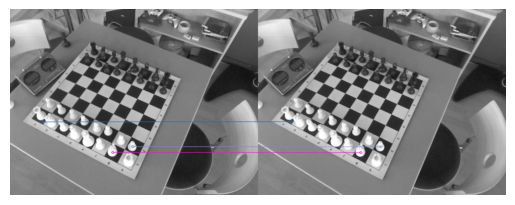

(< cv2.KeyPoint 000001E5BFB6F8D0>, < cv2.KeyPoint 000001E5BE10EB50>, < cv2.KeyPoint 000001E5BE5C2C70>)
(< cv2.KeyPoint 000001E5BA4EF330>, < cv2.KeyPoint 000001E5BA4EDA70>, < cv2.KeyPoint 000001E5BA4ECC60>, < cv2.KeyPoint 000001E5BA4EC450>, < cv2.KeyPoint 000001E5BA4EF390>)
[(0, 0), (3, 1), (4, 2)]
<class 'cv2.DMatch'>


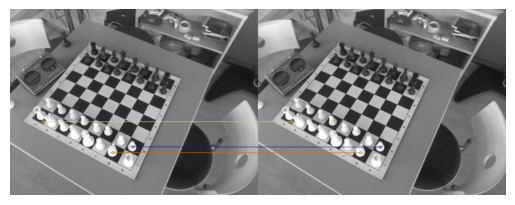

In [26]:

image_names = ['chess/seq-01/frame-000234.color.png', 'chess/seq-01/frame-000235.color.png', 'chess/seq-01/frame-000236.color.png']  # Provide the names of images in sequence

images = []
for i in range(len(image_names)):
    image = getImageFromZip(zipf, image_names[i], cv2.IMREAD_GRAYSCALE)
    images.append(image)

# Create SIFT detector
sift = cv2.SIFT_create()

# Iterate over pairs of consecutive images
for i in range(len(images) - 1):
    # Detect keypoints for current and next image
    keypoints1 = sift.detect(images[i])
    keypoints2 = sift.detect(images[i + 1])

    # Filter keypoints based on response
    keypoints1_filtered = [kp for kp in keypoints1 if kp.response > 0.085]
    keypoints2_filtered = [kp for kp in keypoints2 if kp.response > 0.085]

    # Compute descriptors for filtered keypoints
    keypoints1, descriptors1 = sift.compute(images[i], keypoints1_filtered)
    keypoints2, descriptors2 = sift.compute(images[i + 1], keypoints2_filtered)

    # Create a brute-force matcher
    matcher = cv2.BFMatcher()
    matches = matcher.match(descriptors1, descriptors2)

    print(keypoints1,keypoints2,[(m.trainIdx, m.queryIdx) for m in matches],sep="\n")

    # Optionally, filter matches using Lowe's ratio test
    # Apply ratio test to keep only good matches
    """
    good_matches = []
    for match in matches:
        if match.distance < 0.75 * match.distance:
            good_matches.append(match)
    """
    print(type(matches[0]))
    # Draw matches
    matched_img = cv2.drawMatches(images[i], keypoints1, images[i + 1], keypoints2, matches, None)

    # Display the matched images using pyplot
    plt.imshow(matched_img, cmap='gray')
    plt.axis('off')
    plt.show()



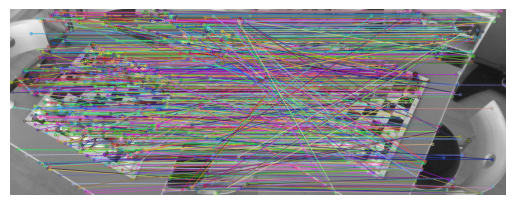

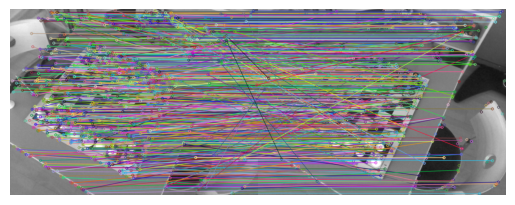

In [53]:

# Load the first image
image_outside = getImageFromZip(zipf, image_names[0], cv2.IMREAD_GRAYSCALE)
keypoints_outside, descriptors_outside = sift.detectAndCompute(image_outside, None)

# Iterate over the rest of the images
for i in range(1, len(image_names)):
    # Load the current image
    image_curr = getImageFromZip(zipf, image_names[i], cv2.IMREAD_GRAYSCALE)
    keypoints_curr, descriptors_curr = sift.detectAndCompute(image_curr, None)

    # Match descriptors between the outside image and the current image
    matcher = cv2.BFMatcher()
    matches = matcher.match(descriptors_outside, descriptors_curr)

    # Draw matches
    matched_img = cv2.drawMatches(image_outside, keypoints_outside, image_curr, keypoints_curr, matches, None)

    # Display the matched images using pyplot
    plt.imshow(matched_img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Replace the outside image and keypoints with the current image and keypoints for the next iteration
    image_outside = image_curr
    keypoints_outside = keypoints_curr
    descriptors_outside = descriptors_curr


In [55]:
# Load the first image and compute keypoints and descriptors
image_outside = getImageFromZip(zipf, image_names[0], cv2.IMREAD_GRAYSCALE)
keypoints_outside, descriptors_outside = sift.detectAndCompute(image_outside, None)

# Filter keypoints based on response
keypoints_outside_filtered = [kp for kp in keypoints_outside if kp.response > 0.07]
descriptors_outside_filtered = np.array([descriptors_outside[kp.pt[1], kp.pt[0]] for kp in keypoints_outside_filtered], dtype=np.float32)

# Iterate over the rest of the images
for i in range(1, len(image_names)):
    # Load the current image and compute keypoints and descriptors
    image_curr = getImageFromZip(zipf, image_names[i], cv2.IMREAD_GRAYSCALE)
    keypoints_curr, descriptors_curr = sift.detectAndCompute(image_curr, None)

    # Filter keypoints based on response
    keypoints_curr_filtered = [kp for kp in keypoints_curr if kp.response > 0.07]
    descriptors_curr_filtered = np.array([descriptors_curr[kp.pt[1], kp.pt[0]] for kp in keypoints_curr_filtered], dtype=np.float32)

    # Match descriptors between the outside image and the current image
    matcher = cv2.BFMatcher()
    matches = matcher.match(descriptors_outside_filtered, descriptors_curr_filtered)

    # Optionally, filter matches using Lowe's ratio test
    good_matches = []
    for match in matches:
        if match.distance < 0.75 * match.distance:
            good_matches.append(match)

    # Draw matches
    matched_img = cv2.drawMatches(image_outside, keypoints_outside_filtered, image_curr, keypoints_curr_filtered, good_matches, None)

    # Display the matched images using pyplot
    plt.imshow(matched_img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Replace the outside image and keypoints with the current image and keypoints for the next iteration
    image_outside = image_curr
    keypoints_outside = keypoints_curr
    descriptors_outside = descriptors_curr
    keypoints_outside_filtered = keypoints_curr_filtered
    descriptors_outside_filtered = descriptors_curr_filtered

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

90.65869903564453
441.9943542480469


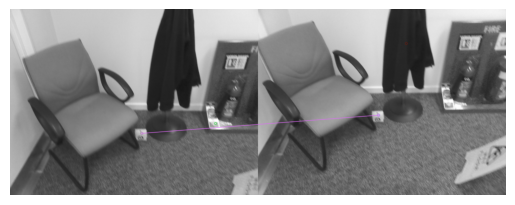

111.13505554199219
484.572998046875


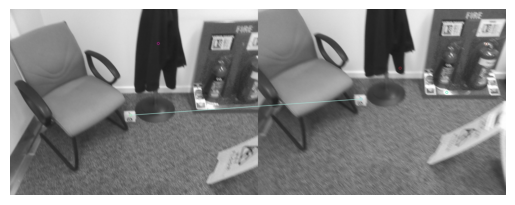

108.75201416015625
138.8272247314453
130.839599609375
353.8573303222656
189.69976806640625
203.08126831054688


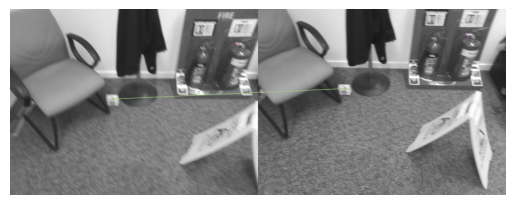

110.02726745605469
108.0555419921875
193.4347381591797
203.07879638671875
70.14984130859375
139.98214721679688


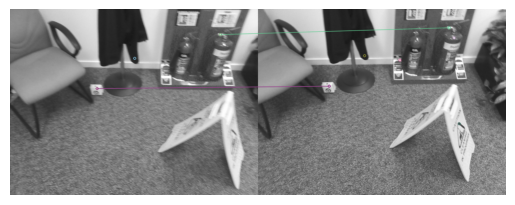

88.91568756103516
89.55445098876953
480.4622802734375
432.75164794921875
420.0606994628906
446.9888000488281
321.64886474609375
405.3270263671875
370.6372985839844
63.44288635253906
104.01922607421875
76.30203247070312


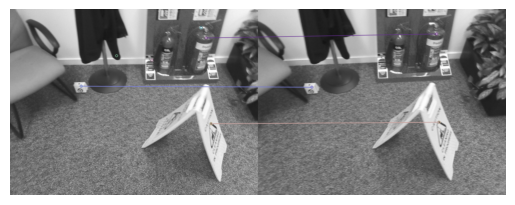

343.6073303222656
113.1415023803711
185.50201416015625
311.38720703125
126.88577270507812


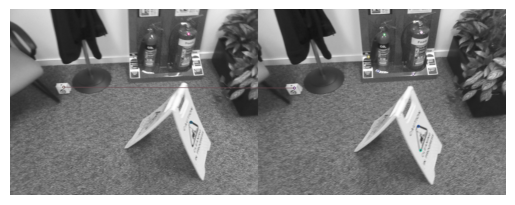

126.02777099609375
205.29977416992188
129.58009338378906
157.07960510253906
97.38069915771484
98.42256164550781
196.23965454101562
205.90774536132812
100.12991333007812
94.55157470703125
132.683837890625
112.75193786621094
380.3537902832031
150.04666137695312


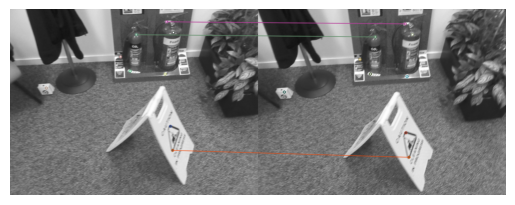

383.1279296875
113.76290893554688
426.86297607421875
350.0999755859375
321.9813537597656
340.84161376953125
424.49029541015625
264.299072265625
260.8716125488281
110.60741424560547
94.64671325683594
452.5262451171875
406.642333984375
457.8798828125
210.73443603515625
371.0808410644531
143.57228088378906
59.53990173339844
65.51335906982422


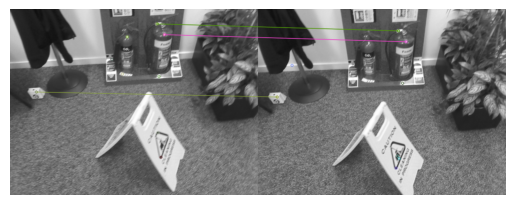

108.00463104248047
137.575439453125
429.9674377441406
100.1898193359375
142.35519409179688
146.31130981445312
444.3647155761719
204.73397827148438
374.3714599609375
348.5971984863281
351.7399597167969


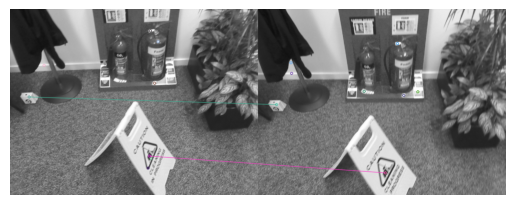

In [25]:

image_names = [f'fire/fire/seq-01/seq-01/frame-000{i}.color.png' for i in range(200,300,10)]

images = []
for i in range(len(image_names)):
    image = getImageFromZip(zipf, image_names[i], cv2.IMREAD_GRAYSCALE)
    images.append(image)

# Load the first image and compute keypoints and descriptors
image_outside = images[0] #getImageFromZip(zipf, image_names[0], cv2.IMREAD_GRAYSCALE)
keypoints_outside = sift.detect(image_outside, None)
keypoints_outside_filtered = [kp for kp in keypoints_outside if kp.response > 0.070]
keypoints_outside, descriptors_outside = sift.compute(image_outside, keypoints_outside_filtered)

# Iterate over the rest of the images
for i in range(1, len(image_names)):
    # Load the current image and compute keypoints and descriptors
    image_curr = getImageFromZip(zipf, image_names[i], cv2.IMREAD_GRAYSCALE)
    keypoints_curr = sift.detect(image_curr, None)
    keypoints_curr_filtered = [kp for kp in keypoints_curr if kp.response > 0.070]
    keypoints_curr, descriptors_curr = sift.compute(image_curr, keypoints_curr_filtered)

    # Match descriptors between the outside image and the current image
    matcher = cv2.BFMatcher()
    matches = matcher.match(descriptors_outside, descriptors_curr)

    
    # Optionally, filter matches using Lowe's ratio test
    good_matches = []
    for match in matches:
        print(match.distance)
        if match.distance < 120:
            good_matches.append(match)
    
    # Draw matches
    matched_img = cv2.drawMatches(image_outside, keypoints_outside_filtered, image_curr, keypoints_curr_filtered, good_matches, None)

    # Display the matched images using pyplot
    plt.imshow(matched_img, cmap='gray')
    plt.axis('off')
    plt.show()

    # Replace the outside image and keypoints with the current image and keypoints for the next iteration
    image_outside = image_curr
    keypoints_outside = keypoints_curr
    descriptors_outside = descriptors_curr
    keypoints_outside_filtered = keypoints_curr_filtered


In [11]:

def pointSet2(zipf, image_names):
    #image_names = [f'fire/fire/seq-01/seq-01/frame-000{i}.color.png' for i in range(200,300,10)]
    images = []
    for i in range(len(image_names)):
        image = getImageFromZip(zipf, image_names[i], cv2.IMREAD_GRAYSCALE)
        images.append(image)

    # Load the first image and compute keypoints and descriptors
    image_outside = images[0] #getImageFromZip(zipf, image_names[0], cv2.IMREAD_GRAYSCALE)
    keypoints_outside = sift.detect(image_outside, None)
    keypoints_outside_filtered = [kp for kp in keypoints_outside if kp.response > 0.070]
    keypoints_outside, descriptors_outside = sift.compute(image_outside, keypoints_outside_filtered)

    keypoints_dict = {}
    # add to dict

    # Iterate over the rest of the images
    for i in range(1, len(image_names)):
        # Load the current image and compute keypoints and descriptors
        image_curr = images[i]
        keypoints_curr = sift.detect(image_curr, None)
        keypoints_curr_filtered = [kp for kp in keypoints_curr if kp.response > 0.070]
        keypoints_curr, descriptors_curr = sift.compute(image_curr, keypoints_curr_filtered)

        # Match descriptors between the outside image and the current image
        matcher = cv2.BFMatcher()
        matches = matcher.match(descriptors_outside, descriptors_curr)
        
        # Optionally, filter matches using Lowe's ratio test
        good_matches = []
        for match in matches:
            print(match.distance)
            if match.distance < 120:
                good_matches.append(match)
        
        # Add keypoints from the next image that do not appear in any of the matchings with the current image
        for kp_next in keypoints_curr:
            is_matched = False
            for match in good_matches:
                if match.trainIdx == keypoints_curr.index(kp_next):
                    is_matched = True
                    break
            if not is_matched:
                keypoints_set.append(kp_next)
        
        # Draw matches
        matched_img = cv2.drawMatches(image_outside, keypoints_outside_filtered, image_curr, keypoints_curr_filtered, good_matches, None)

        # Display the matched images using pyplot
        plt.imshow(matched_img, cmap='gray')
        plt.axis('off')
        plt.show()

        # Replace the outside image and keypoints with the current image and keypoints for the next iteration
        image_outside = image_curr
        keypoints_outside = keypoints_curr
        descriptors_outside = descriptors_curr
        keypoints_outside_filtered = keypoints_curr_filtered


In [123]:
len(keypoints_set)

65

In [12]:
def pointSet(zipf, image_names : list):
    # Create SIFT detector
    sift = cv2.SIFT_create()

    # Initialize a dictionary to store keypoints as keys and their match_times as values
    keypoints_dict = {}

    # Add keypoints from the first image to the dictionary with match_times initialized to 0
    image_first = getImageFromZip(zipf, image_names[0], cv2.IMREAD_GRAYSCALE)
    keypoints_first, _ = sift.detectAndCompute(image_first, None)
    for kp in keypoints_first:
        keypoints_dict[kp] = 0

    # Iterate over pairs of consecutive images
    for i in range(len(image_names) - 1):
        # Load the current and next image
        image_curr = getImageFromZip(zipf, image_names[i], cv2.IMREAD_GRAYSCALE)
        image_next = getImageFromZip(zipf, image_names[i + 1], cv2.IMREAD_GRAYSCALE)

        # Detect keypoints and compute descriptors for the current and next image
        keypoints_curr, descriptors_curr = sift.detectAndCompute(image_curr, None)
        keypoints_next, descriptors_next = sift.detectAndCompute(image_next, None)

        # Match descriptors between the current and next image
        matcher = cv2.BFMatcher()
        matches = matcher.match(descriptors_curr, descriptors_next)

        # Iterate over matches and update match_times for keypoints from the current image
        for match in matches:
            idx_next = match.trainIdx
            kp_next = keypoints_next[idx_next]
            if kp_next in keypoints_dict:
                keypoints_dict[kp_next] += 1

        # Add keypoints from the next image that do not appear in any of the matchings with the current image
        for kp_next in keypoints_next:
            if kp_next not in keypoints_dict:
                keypoints_dict[kp_next] = 0
    return keypoints_dict
    # Convert the dictionary of keypoints back to a list of [keypoint, match_times] pairs
    #keypoints_list = [[kp, match_times] for kp, match_times in keypoints_dict.items()]


In [13]:
pointSet(zipf, image_names)
{kp: match_times for kp, match_times in pointSet(zipf, image_names).items() if match_times > 0}

{}

In [9]:
import cv2 as cv
import math

from collections import deque
import copy

class PointCloud:
    class ImgContainer:
        imreadFlag = cv.IMREAD_GRAYSCALE
        def __init__(self, pointcloud, index):
            self.pcloud = pointcloud
            self.idx = index
            # Img
            img = self.__getImageFromZip(self.pcloud.pathi[index])
            # Keypoints and descs
            keypoints = self.pcloud.sift.detect(img)
            keypoints_filtered = [kp for kp in keypoints if kp.response > self.pcloud.keypointminresp]
            self.points, self.descs = self.pcloud.sift.compute(img, keypoints_filtered)
            # Pose
            self.posemat = self.__getPoseFromZip(self.pcloud.pathp[index])
            # Links
            self.links = [None] * len(self.points)
        # Helpers
        def __getImageFromZip(self, path):
            image_data = self.pcloud.zipf.read(path)
            image_buffer = io.BytesIO(image_data)
            return cv.imdecode(np.frombuffer(image_buffer.getvalue(), np.uint8), self.imreadFlag)
        def __getPoseFromZip(self, path) -> np.ndarray:
            ptxt = self.pcloud.zipf.read(path)
            t = np.array(str(ptxt,encoding="UTF-8")[2:-3].replace("\r\n","").split("\t ")).astype(np.float32)
            return t.reshape(4,4)
        def matchDescWith(self, query_imgc) -> list[cv.DMatch]:
            # TODO: ORDER MATTERS! match.trainIdx is in self.descs while match.queryIdx is in query_imgc
            matches = self.pcloud.matcher.match(query_imgc.descs, self.descs)
            # TODO: apply proper match filtering (Lows test?)
            good_matches = []
            for match in matches:
                if match.distance < self.pcloud.matchmaxdist:
                    good_matches.append(match)
            good_matches.sort(key=lambda x: x.distance, reverse=False)
            k = math.floor(len(good_matches)**0.5) if len(good_matches) > 8 else 2
            return good_matches[len(good_matches)//k:]
        def addMatchesToLinks(self, mlist : list[cv.DMatch], revidx : int) -> None:
            # print(keypoints1,keypoints2,[(m.trainIdx, m.queryIdx) for m in matches],sep="\n")
            for i in range(len(mlist)):
                # train is self, query is one in refidx
                if self.links[mlist[i].trainIdx] == None:
                    self.links[mlist[i].trainIdx] = (mlist[i].queryIdx, revidx, 0)
                else:
                    self.links[mlist[i].trainIdx] = (mlist[i].queryIdx, revidx, self.links[mlist[i].trainIdx][-1]+1)
        # Multiply 2d image point with inverse of intrinsic and extrinsic matrices to get vector describing the 3d ray of point
        #def getPointRay(index : int) -> np.ndarray():
        #    pass
        # Debug
        def __repr__(self):
            return f"Idx:{self.idx}\tLinks[{sum(1 for _ in filter(None.__ne__, self.links))}]:{self.links}\tKeyp[{len(self.points)}]:{self.points}"
    # Building methods (pathsimg and pos except list or generator objects)
    def __init__(self, zipfile, pathsimg, pathspos, totalimgnum):
        # Data loading
        self.zipf = zipfile
        self.pathi = pathsimg
        self.pathp = pathspos
        self.imgnum = totalimgnum
    def __resetAlgorithm(self, windowSize : int, keypointMinResponse : float, matchMaxDistance : float):
        self.windowqueue = deque()
        self.paststack = deque()
        self.sift = cv.SIFT_create()
        self.matcher = cv.BFMatcher()
        # Hyperparams
        self.windowsz = windowSize
        self.keypointminresp = keypointMinResponse
        self.matchmaxdist = matchMaxDistance
    def __linkPoints(self):
        self.windowqueue.append(self.ImgContainer(self, 0))
        for i in range(1,self.imgnum):
            imgc = self.ImgContainer(self, i)
            if len(imgc.points) > 0:
                k = 0
                for frame in self.windowqueue:
                    if len(frame.points) > 0:
                        mlist = imgc.matchDescWith(frame)
                        imgc.addMatchesToLinks(mlist, - len(self.windowqueue) + k)
                        # print(list((m.trainIdx,m.queryIdx) for m in mlist))
                    k += 1
                self.windowqueue.append(imgc)
                if len(self.windowqueue) > self.windowsz:
                    self.paststack.append(self.windowqueue.popleft())
            # print("\n======================")
        # push letfovers in window
        while len(self.windowqueue) != 0:
            self.paststack.append(self.windowqueue.popleft())
    def __collectPoints(self):
        return
        pstacks = deque()
        while(len(self.paststack) > 0):
            unlinked = copy.deepcopy(self.paststack[-1])
            # Iterate over pstacks and push next
            
    def __reverseProjection(self):
        pass
    def __geometricStorage(self):
        pass
    def buildPointCloud(self, windowSize : int, keyointMinResponse : float, matchMaxDistance : float):
        """
        windowSize : number of backwards images that will be tried to match (closest match is registered for every point)
        keypointMinResponse : minimum 'quality' of point accepted during sift point detection value in [0,1]
        """
        self.__resetAlgorithm(windowSize, keyointMinResponse, matchMaxDistance)
        self.__linkPoints()
        self.__collectPoints()
        self.__reverseProjection()
        self.__geometricStorage()

In [10]:
ipathgen = [f'fire/fire/seq-01/seq-01/frame-000{i}.color.png' for i in range(200,300,10)]
ppathgen = [f'fire/fire/seq-01/seq-01/frame-000{i}.pose.txt' for i in range(200,300,10)]
pc = PointCloud(zipf, ipathgen, ppathgen, len(ipathgen))

In [11]:
pc.buildPointCloud(windowSize=4, keyointMinResponse=0.070, matchMaxDistance=250)

In [12]:
for i in pc.paststack:
    print(i)

Idx:0	Links[0]:[None, None]	Keyp[2]:(< cv2.KeyPoint 000002BCFAA8FC30>, < cv2.KeyPoint 000002BCFAA8FD20>)
Idx:1	Links[1]:[(0, -1, 0), None]	Keyp[2]:(< cv2.KeyPoint 000002BCFAA8CDB0>, < cv2.KeyPoint 000002BCFAA8CDE0>)
Idx:2	Links[1]:[(0, -1, 1), None, None, None, None, None]	Keyp[6]:(< cv2.KeyPoint 000002BCFAA5E8E0>, < cv2.KeyPoint 000002BCFAA5E910>, < cv2.KeyPoint 000002BCFAA5E8B0>, < cv2.KeyPoint 000002BCFAA5E940>, < cv2.KeyPoint 000002BCFAA5FF60>, < cv2.KeyPoint 000002BCFAA5FF00>)
Idx:3	Links[4]:[(0, -2, 1), (1, -1, 0), None, None, (4, -1, 0), (5, -1, 0)]	Keyp[6]:(< cv2.KeyPoint 000002BCFAA740C0>, < cv2.KeyPoint 000002BCFAA74090>, < cv2.KeyPoint 000002BCFAA74060>, < cv2.KeyPoint 000002BCFAA74030>, < cv2.KeyPoint 000002BCFAA74360>, < cv2.KeyPoint 000002BCFAA74390>)
Idx:4	Links[5]:[(0, -2, 1), (1, -2, 0), (3, -1, 0), (2, -1, 0), None, None, None, (5, -1, 0), None, None, None, None]	Keyp[12]:(< cv2.KeyPoint 000002BCFAAB4420>, < cv2.KeyPoint 000002BCFAAB4450>, < cv2.KeyPoint 000002BCFAAB4

C:\Users\asus guest\AppData\Local\Temp\ipykernel_12988\2919078305.py:56: DeprecationWarning: NotImplemented should not be used in a boolean context
  return f"Idx:{self.idx}\tLinks[{sum(1 for _ in filter(None.__ne__, self.links))}]:{self.links}\tKeyp[{len(self.points)}]:{self.points}"


In [13]:
pc.paststack

C:\Users\asus guest\AppData\Local\Temp\ipykernel_12988\2919078305.py:56: DeprecationWarning: NotImplemented should not be used in a boolean context
  return f"Idx:{self.idx}\tLinks[{sum(1 for _ in filter(None.__ne__, self.links))}]:{self.links}\tKeyp[{len(self.points)}]:{self.points}"


deque([Idx:0	Links[0]:[None, None]	Keyp[2]:(< cv2.KeyPoint 000002BCFAA8FC30>, < cv2.KeyPoint 000002BCFAA8FD20>),
       Idx:1	Links[1]:[(0, -1, 0), None]	Keyp[2]:(< cv2.KeyPoint 000002BCFAA8CDB0>, < cv2.KeyPoint 000002BCFAA8CDE0>),
       Idx:2	Links[1]:[(0, -1, 1), None, None, None, None, None]	Keyp[6]:(< cv2.KeyPoint 000002BCFAA5E8E0>, < cv2.KeyPoint 000002BCFAA5E910>, < cv2.KeyPoint 000002BCFAA5E8B0>, < cv2.KeyPoint 000002BCFAA5E940>, < cv2.KeyPoint 000002BCFAA5FF60>, < cv2.KeyPoint 000002BCFAA5FF00>),
       Idx:3	Links[4]:[(0, -2, 1), (1, -1, 0), None, None, (4, -1, 0), (5, -1, 0)]	Keyp[6]:(< cv2.KeyPoint 000002BCFAA740C0>, < cv2.KeyPoint 000002BCFAA74090>, < cv2.KeyPoint 000002BCFAA74060>, < cv2.KeyPoint 000002BCFAA74030>, < cv2.KeyPoint 000002BCFAA74360>, < cv2.KeyPoint 000002BCFAA74390>),
       Idx:4	Links[5]:[(0, -2, 1), (1, -2, 0), (3, -1, 0), (2, -1, 0), None, None, None, (5, -1, 0), None, None, None, None]	Keyp[12]:(< cv2.KeyPoint 000002BCFAAB4420>, < cv2.KeyPoint 000002BC

In [5]:

from zipfile import *
import io

import numpy as np
import cv2 as cv

def getImageFromZip(zipf: ZipFile, path: str, imreadFlag) -> np.ndarray:
    """
    Loads image file in given path as descrived by imreadFlag(s)
    """
    image_data = zipf.read(path)
    image_buffer = io.BytesIO(image_data)
    return cv.imdecode(np.frombuffer(image_buffer.getvalue(), np.uint8), imreadFlag)

def getPoseFromZip(zipf: ZipFile, path: str, imreadFlag) -> np.ndarray:
    """
    Loads camera matrix containing pose information from file in given path as a 4x4 numpy matrix
    """
    ptxt = zipf.read(path)
    t = np.array(str(ptxt,encoding="UTF-8")[2:-3].replace("\r\n","").split("\t ")).astype(np.float32)
    return t.reshape(4,4)

In [12]:
import cv2 as cv
import math

from zipfile import *

from collections import deque
import copy

import logging

class PointCloudBuilder:
    class ImgContainer:
        imreadFlag = cv.IMREAD_GRAYSCALE
        def __init__(self, pointcloud, index: int):
            self.pcloud = pointcloud
            self.idx = index
            # Img
            img = getImageFromZip(self.zipf, self.pcloud.pathi[index], self.imreadFlag)
            # Keypoints and descs
            keypoints = self.pcloud.sift.detect(img)
            keypoints_filtered = [kp for kp in keypoints if kp.response > self.pcloud.keypointminresp]
            self.points, self.descs = self.pcloud.sift.compute(img, keypoints_filtered)
            # Pose
            self.posemat = getPoseFromZip(self.pcloud.pathp[index])
            # Links
            self.links = [None] * len(self.points)
        def matchDescWith(self, query_imgc) -> list[cv.DMatch]:
            """
            Creates a list of SIFT matches between points of this image and query image given
            """
            # TODO: ORDER MATTERS! match.trainIdx is in self.descs while match.queryIdx is in query_imgc
            matches = self.pcloud.matcher.match(query_imgc.descs, self.descs)
            # TODO: apply proper match filtering (Lows test?)
            good_matches = []
            for match in matches:
                if match.distance < self.pcloud.matchmaxdist:
                    good_matches.append(match)
            good_matches.sort(key=lambda x: x.distance, reverse=False)
            k = math.floor(len(good_matches)**0.5) if len(good_matches) > 8 else 2
            return good_matches[len(good_matches)//k:]
        def addMatchesToLinks(self, mlist: list[cv.DMatch], revidx: int, tracecount: int) -> int:
            """
            Transfers matches obtained by matchDescWith in list to links list
            Returns new trace count
            """
            # print(keypoints1,keypoints2,[(m.trainIdx, m.queryIdx) for m in matches],sep="\n")
            for i in range(len(mlist)):
                # train is self, query is one in refidx
                if self.links[mlist[i].trainIdx] == None:
                    self.links[mlist[i].trainIdx] = (mlist[i].queryIdx, revidx, 0, tracecount)
                    tracecount += 1
                else:
                    self.links[mlist[i].trainIdx] = (mlist[i].queryIdx, revidx, self.links[mlist[i].trainIdx][-2]+1, self.links[mlist[i].trainIdx][-1])
            return tracecount
        # Debug
        def __repr__(self):
            return f"Idx:{self.idx}\tLinks[{sum(1 for _ in filter(None.__ne__, self.links))}]:{self.links}\tKeyp[{len(self.points)}]:{self.points}"
    # Building methods (pathsimg and pos except list or generator objects)
    def __init__(self, zipfile: ZipFile, pathsimg, pathspos, totalimgnum: int):
        # Data loading
        self.zipf = zipfile
        self.pathi = pathsimg
        self.pathp = pathspos
        self.imgnum = totalimgnum
        # Logger
    def __resetAlgorithm(self, windowSize: int, keypointMinResponse: float, matchMaxDistance: float):
        self.windowqueue = deque()
        self.paststack = deque()
        self.sift = cv.SIFT_create()
        self.matcher = cv.BFMatcher()
        # Hyperparams
        self.windowsz = windowSize
        self.keypointminresp = keypointMinResponse
        self.matchmaxdist = matchMaxDistance
    def __linkPoints(self):
        tracecount = 0
        self.windowqueue.append(self.ImgContainer(self, 0))
        for i in range(1,self.imgnum):
            imgc = self.ImgContainer(self, i)
            if len(imgc.points) > 0:
                k = 0
                for frame in self.windowqueue:
                    if len(frame.points) > 0:
                        mlist = imgc.matchDescWith(frame)
                        tracecount = imgc.addMatchesToLinks(mlist, - len(self.windowqueue) + k, tracecount)
                        # print(list((m.trainIdx,m.queryIdx) for m in mlist))
                    k += 1
                self.windowqueue.append(imgc)
                if len(self.windowqueue) > self.windowsz:
                    self.paststack.append(self.windowqueue.popleft())
            # print("\n======================")
        # push letfovers in window
        while len(self.windowqueue) != 0:
            self.paststack.append(self.windowqueue.popleft())
    def __collectTraces(self):
        pass
        """
        pstacks = deque()
        while(len(self.paststack) > 0):
            unlinked = copy.deepcopy(self.paststack[-1])
            # Iterate over pstacks and push next

        """ 
    def __reverseProjection(self):
        pass
    def __geometricStorage(self):
        pass
    def buildPointCloud(self, windowSize: int, keyointMinResponse: float, matchMaxDistance: float):
        """
        windowSize : number of backwards images that will be tried to match (closest match is registered for every point)
        keypointMinResponse : minimum 'quality' of point accepted during sift point detection value in [0,1]
        maxMatchDistance : maximum distance (lack of similarity) between selected and query point for acceptance of query
        """
        self.__resetAlgorithm(windowSize, keyointMinResponse, matchMaxDistance)
        self.__linkPoints()
        self.__collectTraces()
        self.__reverseProjection()
        self.__geometricStorage()

In [13]:
ipathgen = [f'fire/fire/seq-01/seq-01/frame-000{i}.color.png' for i in range(200,300,10)]
ppathgen = [f'fire/fire/seq-01/seq-01/frame-000{i}.pose.txt' for i in range(200,300,10)]
pc = PointCloudBuilder(zipf, ipathgen, ppathgen, len(ipathgen))

In [14]:
pc.buildPointCloud(windowSize=4, keyointMinResponse=0.070, matchMaxDistance=250)

AttributeError: 'ImgContainer' object has no attribute 'zipf'

In [19]:
for i in pc.paststack:
    print(i)

Idx:0	Links[0]:[None, None]	Keyp[2]:(< cv2.KeyPoint 000002BCFAA82940>, < cv2.KeyPoint 000002BCFAA823D0>)
Idx:1	Links[1]:[(0, -1, 0), None]	Keyp[2]:(< cv2.KeyPoint 000002BCFAA81E30>, < cv2.KeyPoint 000002BCFAA81DA0>)
Idx:2	Links[1]:[(0, -1, 1), None, None, None, None, None]	Keyp[6]:(< cv2.KeyPoint 000002BCFAA80480>, < cv2.KeyPoint 000002BCFAA804E0>, < cv2.KeyPoint 000002BCFAA80540>, < cv2.KeyPoint 000002BCFAA80570>, < cv2.KeyPoint 000002BCFAA80510>, < cv2.KeyPoint 000002BCFAA81AA0>)
Idx:3	Links[4]:[(0, -2, 1), (1, -1, 0), None, None, (4, -1, 0), (5, -1, 0)]	Keyp[6]:(< cv2.KeyPoint 000002BCFAA77060>, < cv2.KeyPoint 000002BCFAA75A10>, < cv2.KeyPoint 000002BCFAA77930>, < cv2.KeyPoint 000002BCFAA77C90>, < cv2.KeyPoint 000002BCFAA74540>, < cv2.KeyPoint 000002BCFAA77090>)
Idx:4	Links[5]:[(0, -2, 1), (1, -2, 0), (3, -1, 0), (2, -1, 0), None, None, None, (5, -1, 0), None, None, None, None]	Keyp[12]:(< cv2.KeyPoint 000002BC802072A0>, < cv2.KeyPoint 000002BC802072D0>, < cv2.KeyPoint 000002BC80207

C:\Users\asus guest\AppData\Local\Temp\ipykernel_12988\2919078305.py:56: DeprecationWarning: NotImplemented should not be used in a boolean context
  return f"Idx:{self.idx}\tLinks[{sum(1 for _ in filter(None.__ne__, self.links))}]:{self.links}\tKeyp[{len(self.points)}]:{self.points}"
